# Pipeline de Processamento e Análise de Dados de Vendas
## Michel Souza Santana
> 09/07/2023

### Descrição:
Contratado para desenvolver um pipeline de processamento e análise de dados de vendas de uma loja online. O objetivo é coletar, armazenar e analisar os dados de vendas para obter insights sobre o desempenho da loja, identificar padrões de consumo dos clientes e apoiar a tomada de decisões estratégicas.

### Objetivos:

* Coletar dados de vendas da loja online, incluindo informações como produtos vendidos, datas e valores das transações, e informações do cliente.
* Armazenar os dados de vendas de forma estruturada e escalável, permitindo consultas eficientes e recuperação rápida de informações.
* Realizar transformações nos dados para padronizar formatos, limpar dados inconsistentes e enriquecer as informações com dados adicionais, como dados demográficos dos clientes.
* Criar dashboards e relatórios interativos para visualização dos dados de vendas, como gráficos de vendas por período, análise de produtos mais vendidos e análise de comportamento do cliente.
* Implementar algoritmos de análise de dados, como análise de associação de produtos, segmentação de clientes e previsão de demanda, para obter insights adicionais.
* Automatizar o pipeline de processamento e análise de dados para garantir a atualização contínua dos dados e dos relatórios.

### Requisitos:

* Coletar dados de vendas da loja online de diferentes fontes, como bancos de dados transacionais, APIs ou arquivos CSV.
* Utilizar uma plataforma de armazenamento de dados escalável, como um data warehouse ou um sistema de armazenamento distribuído.
* Desenvolver scripts ou pipelines de ETL (Extract, Transform, Load) para processar os dados de vendas, realizando limpeza, transformação e enriquecimento dos dados.
* Utilizar ferramentas de visualização de dados, como Tableau, Power BI ou matplotlib, para criar dashboards e relatórios interativos.
* Implementar algoritmos de análise de dados utilizando bibliotecas como pandas, scikit-learn ou Spark, dependendo da escala dos dados e dos recursos disponíveis.
* Agendar a execução automatizada do pipeline, garantindo que os dados sejam atualizados regularmente e os relatórios sejam gerados em intervalos pré-definidos.

### Etapas do Projeto:

* Identificação das fontes de dados disponíveis e definição do escopo do projeto.
* Projeto da arquitetura do pipeline, incluindo a seleção das ferramentas e tecnologias adequadas.
* Desenvolvimento dos scripts ou pipelines de ETL para coleta, processamento e armazenamento dos dados de vendas.
* Criação dos dashboards e relatórios interativos para visualização dos dados de vendas.
* Implementação dos algoritmos de análise de dados para obter insights adicionais.
* Testes e ajustes do pipeline, garantindo que os dados sejam processados corretamente e os relatórios sejam precisos.
* Implantação do pipeline em um ambiente de produção e agendamento das execuções automatizadas.
* Monitoramento contínuo do pipeline, identificando e resolvendo possíveis problemas.
* Documentação do projeto, incluindo diagramas de arquitetura, descrição dos processos de ETL e guias de uso dos dashboards e relatórios.

https://www.kaggle.com/datasets/sdolezel/black-friday

https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

## Informações sobre atributos
ID da fatura: 

* número de identificação da fatura de comprovante de vendas gerado por computador

Filial: 

* Filial de supercentros ( 3 ramificações estão disponíveis identificadas por A, B e C ).

Cidade: 

* Localização dos supercentros

Tipo de cliente: 

* Tipo de cliente, registrado pelos Membros para clientes que usam cartão de membro e Normal para sem cartão de membro.

Gênero: 

* Tipo de gênero do cliente

Linha de produtos: 

* Grupos gerais de categorização de itens - Acessórios eletrônicos, Acessórios de moda, Alimentos e bebidas, Saúde e beleza, Casa e estilo de vida, Esportes e viagens

Preço unitário: 

* Preço de cada produto em $

Quantidade: 

* Número de produtos comprados pelo cliente

Imposto: 

* taxa de imposto de 5% para compra de clientes

Total: 

* Preço total incluindo impostos

Data: 

* Data da compra ( Registro disponível de janeiro de 2019 a março de 2019 )

Tempo: 

* Tempo de compra ( 10h às 21h )

Pagamento: 

* Pagamento usado pelo cliente para compra ( 3 métodos estão disponíveis – Dinheiro, cartão de crédito e Ewallet )

CPV: 

* Custo dos produtos vendidos

Percentual de margem bruta: 

* porcentagem da margem bruta

Renda bruta: 

* Renda bruta

Classificação: 

* classificação de estratificação do cliente em sua experiência geral de compra ( Em uma escala de 1 a 10 )


## Arquitetura e Descrição do Projeto

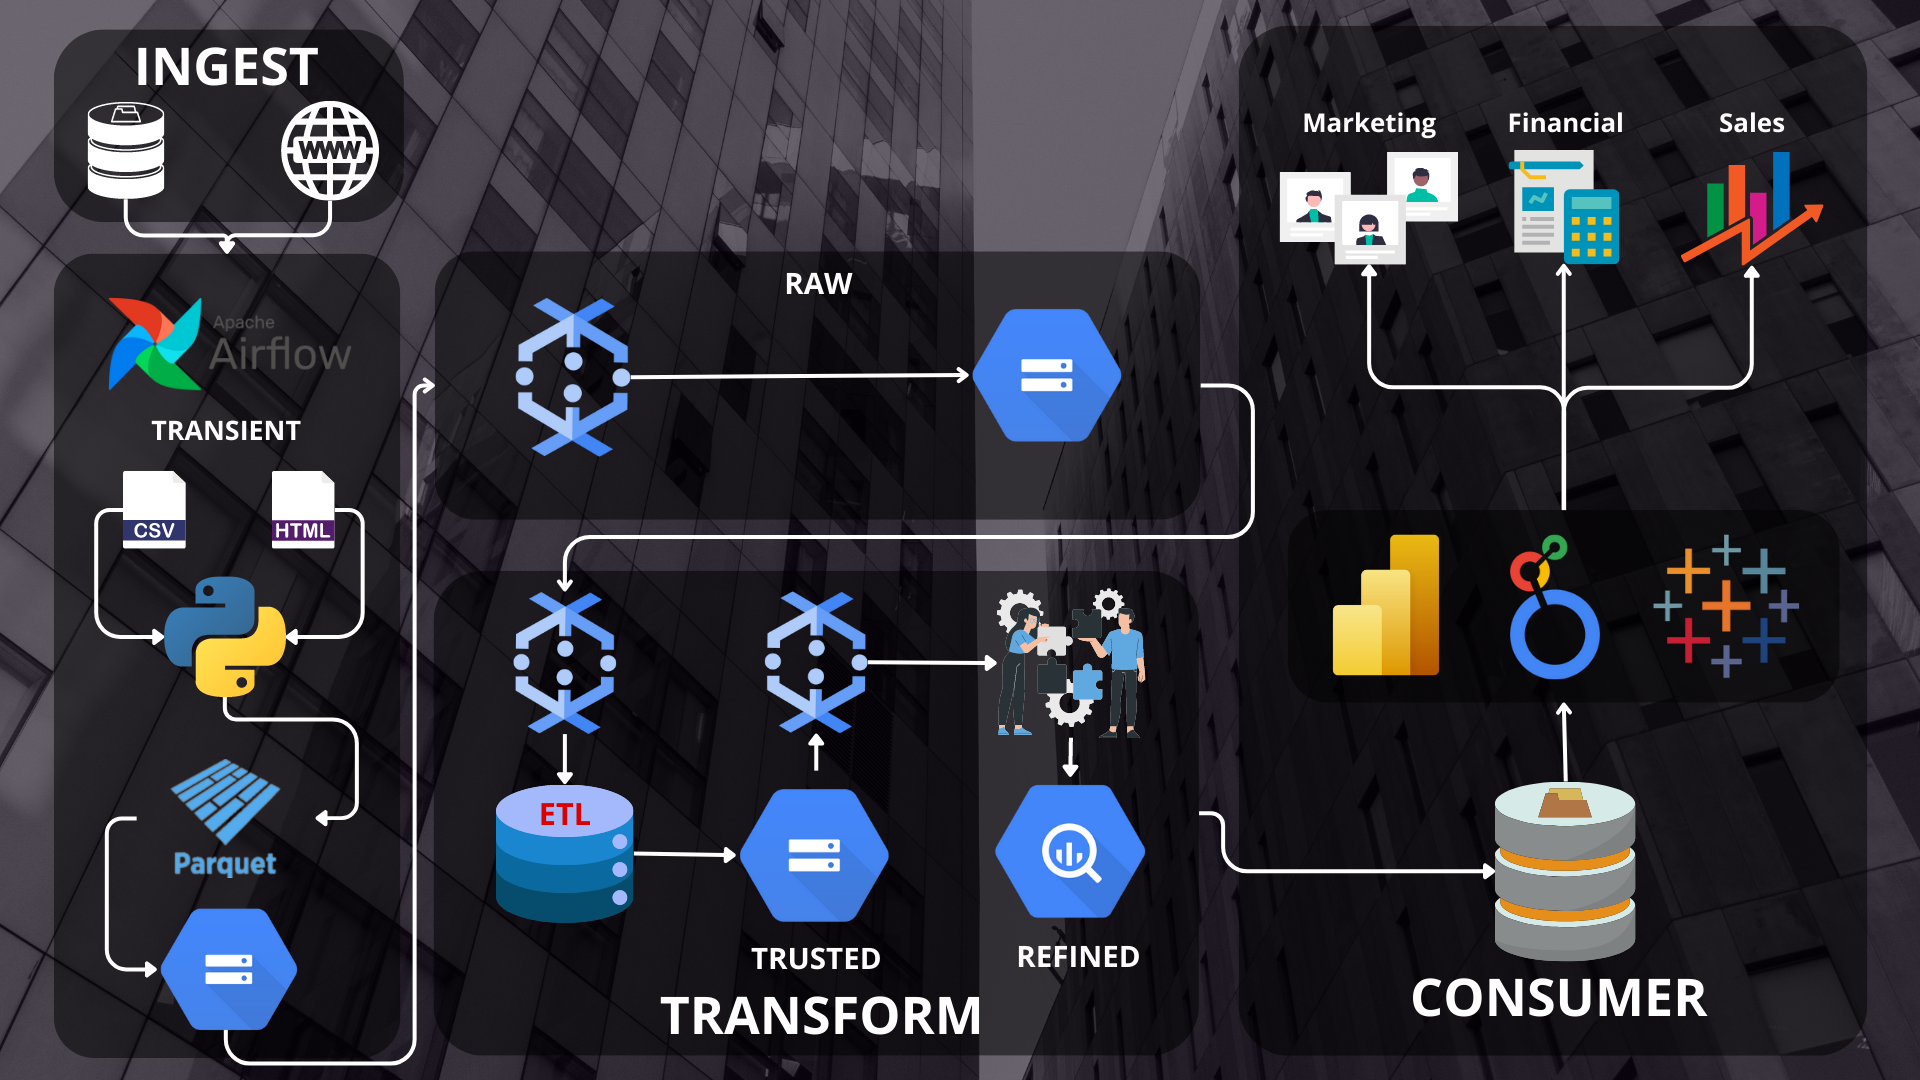

Ingestão de banco de dados local usando Airflow e Python: 

* Essa etapa envolve a criação de tarefas no Airflow para extrair os dados do banco de dados local do cliente e importá-los para o ambiente do GCP. Isso pode ser feito por meio de scripts Python no airflow que se conectam ao banco de dados local e fazem a transferência dos dados.

Scraper e ingestão de dados adicionais da web: 

* Essa etapa envolve a criação de uma função ou script Python para realizar o scraping dos dados da web e adicionar esses dados junto aos importados do banco de dados local. Isso pode ser feito usando bibliotecas de scraping como BeautifulSoup ou Scrapy.

Salvando os dados na camada transient do Google Cloud Storage: 

* Após a ingestão dos dados, estes serão armazenados na camada transient do Google Cloud Storage. A camada transient é usada para armazenar dados temporários, que são usados como intermediários durante o processamento.

Consumo dos dados com Google Dataflow, unificação e conversão para Parquet: 

* Nesta etapa, será utilizado o Google Dataflow para consumir os dados da camada transient, unificá-los e converter para o formato Parquet. Isso pode envolver a criação de tarefas no Google Dataflow para processar e transformar os dados, utilizando bibliotecas Python como Pandas ou PySpark.

Salvamento dos dados na camada raw do Google Cloud Storage: 

* Após a unificação e conversão dos dados, estes serão salvos na camada raw do Google Cloud Storage utilizando o conceito de Insert, update e Delite. A camada raw é usada para armazenar dados brutos, sem transformações adicionais, permitindo o reprocessamento e histórico dos dados.

Consumo dos dados com Dataflow para realizar o processo de ETL: 

* Nesta etapa, será utilizado o Google Dataflow para realizar o processo de ETL (Extração, Transformação e Carga). O Dataflow permite processar grandes volumes de dados de forma escalável e paralela. Aqui, poderá ser aplicada transformações avançadas, limpeza os dados, realização de deduplicação, filtragem, agregações, entre outras operações de ETL.

Salvamento dos dados na camada refined: 

* Após a etapa de ETL, os dados refinados e processados podem ser salvos na camada refined do Google Cloud Storage. Nessa camada, será aplicada as regras de negócio, criação das tabelas dimensionais e fatos, e realizada outras manipulações necessárias para atender às necessidades de análise e consumo dos dados.

Consumo dos dados via Power BI ou outras ferramentas: 

* Após todas as etapas anteriores, os dados estarão prontos para o consumo via Power BI ou outras ferramentas de visualização e análise de dados. Aqui, pode conectar-se diretamente ao Google Cloud BigQuery ou importar os dados para uma outra base de dados adequada para uso com o Power BI e derivados.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/home/michel/Documentos/Pipeline de Processamento e Análise de Dados de Vendas/Supermarket_Sales/data/supermarket_sales - Sheet1.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [11]:
result = df.groupby('City')['Unit price'].sum().sort_values(ascending=False)
result

City
Yangon       18625.49
Naypyitaw    18567.76
Mandalay     18478.88
Name: Unit price, dtype: float64

População

https://www.dadosmundiais.com/asia/mianmar/index.php

Population	Latitude/Longitude

http://www.geonames.org/MM/largest-cities-in-myanmar-%5Bburma%5D.html